# Import Library

In [ ]:
import sys
import IPython
import IPython.display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import logging

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Quick Data

Xem nhanh 5 dữ liệu đầu tiên

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/archive/zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


show các features

In [ ]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

check tổng bộ dữ liệu có null hay không?

In [ ]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

rename lại các tên feature cho dễ xử lý cho các bước tiếp theo

In [ ]:
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

In [ ]:
sorted(data)
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

Loại bỏ các dữ liệu null.

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

Label Encoder 2 feature có 2 loại đáp án Yes, No giống nhau và chuyển về kiểu float

In [ ]:
X = data.copy()

le = LabelEncoder()  
X.online_order = le.fit_transform(X.online_order)
X.book_table = le.fit_transform(X.book_table)
X['online_order'].unique()
X['book_table'].unique()
X.online_order.astype(float)
X.book_table.astype(float)
X.book_table

0        1
1        0
2        0
3        0
4        0
        ..
51705    1
51707    0
51708    0
51711    0
51715    1
Name: book_table, Length: 23193, dtype: int64

In [ ]:
X.rate.head()
X.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

remove /5 từ rate.

In [ ]:
# def handlerate(value):
#     if(value=='NEW' or value=='-'):
#         return np.nan
#     else:
#         value = str(value).split('/')
#         value = value[0]
#         return float(value)
    
# data['rate'] = data['rate'].apply(handlerate)
# data['rate'].head()

In [ ]:
X = X.loc[X.rate !='NEW']

X = X.loc[X.rate !='-'].reset_index(drop=True)

X.rate= X.rate.astype(str)

X.rate=X.rate.apply(lambda x : x.replace('/5',''))
X.rate=X.rate.astype(float)
X.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23041    3.8
23042    3.9
23043    2.8
23044    2.5
23045    4.3
Name: rate, Length: 23046, dtype: float64

In [ ]:
X.cost = X.cost.astype(str)
X.cost = X.cost.apply(lambda x : x.replace(',',''))
X.cost = X.cost.astype(float)
X.cost

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
23041    1200.0
23042    2000.0
23043    1200.0
23044     800.0
23045    2500.0
Name: cost, Length: 23046, dtype: float64

In [ ]:
X.votes.astype(float)

0        775.0
1        787.0
2        918.0
3         88.0
4        166.0
         ...  
23041    128.0
23042     77.0
23043    161.0
23044     81.0
23045    236.0
Name: votes, Length: 23046, dtype: float64

Xoá các samples giống nhau.

In [ ]:
X.drop_duplicates(keep='first',inplace = True)

In [ ]:
X.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data visualization

Text(0.5, 1.0, 'Location')

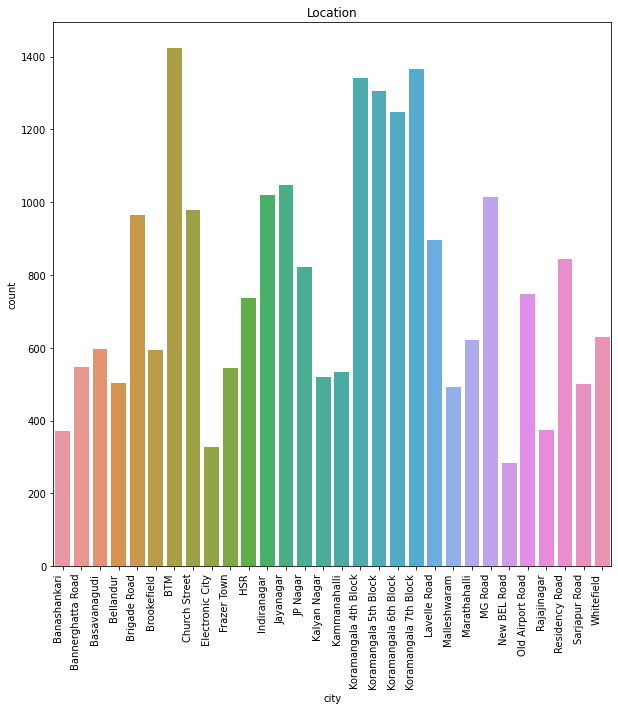

In [ ]:
sns.countplot(data['city'])
sns.countplot(data['city']).set_xticklabels(sns.countplot(data['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Location')

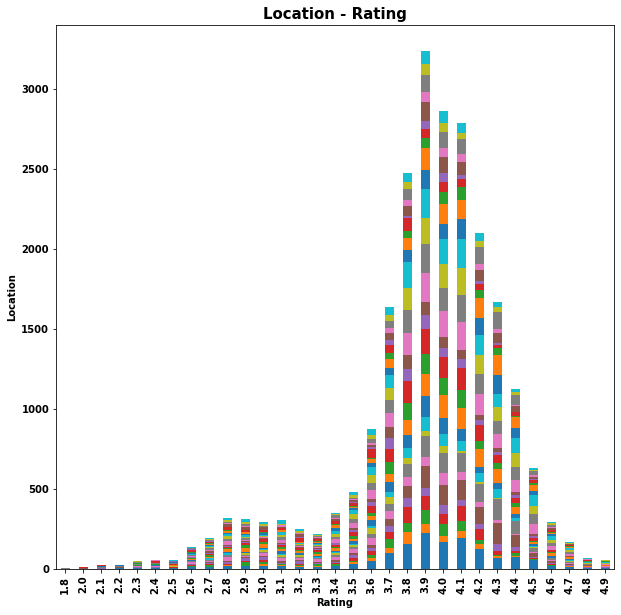

In [ ]:
loc_plt=pd.crosstab(X['rate'],X['city'])
loc_plt.plot(kind='bar',stacked=True);
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

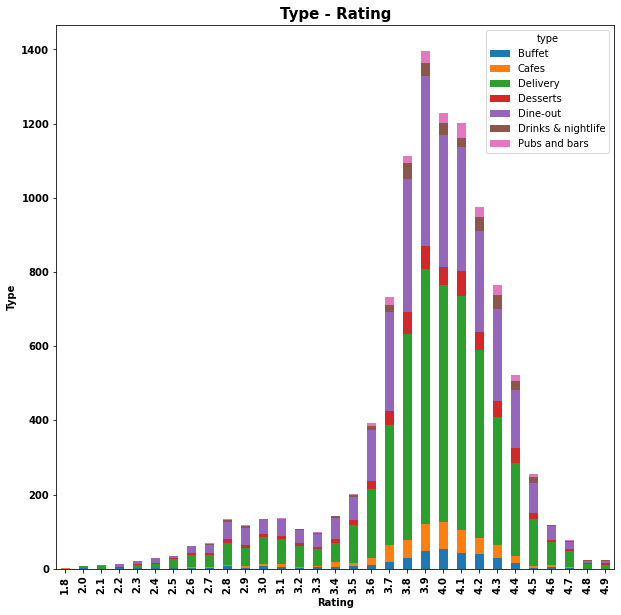

In [ ]:
type_plt=pd.crosstab(X['rate'],data['type'])
type_plt.plot(kind='bar',stacked=True);
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

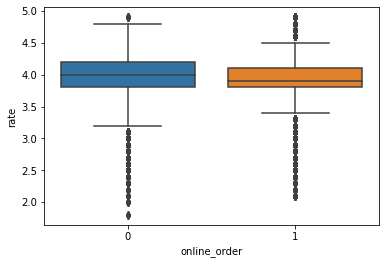

In [ ]:
sns.boxplot(x=X.online_order, y =X.rate ,data = X)

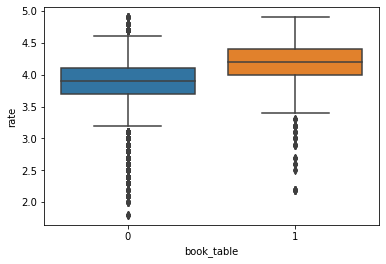

In [ ]:
sns.boxplot(x=X.book_table, y =X.rate ,data = X)

Text(0.5, 1.0, 'Restaurants delivering online or not')

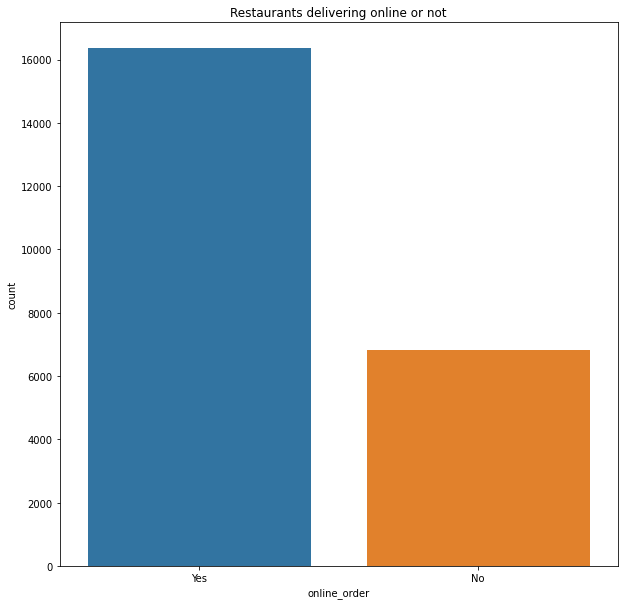

In [ ]:
sns.countplot(x='online_order',data=data)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or not')

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

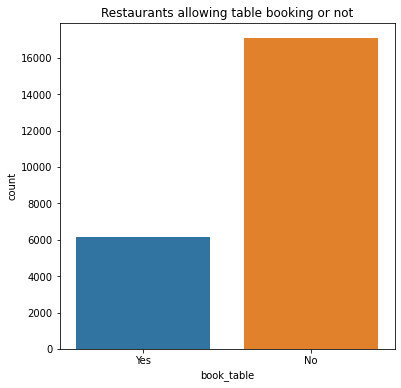

In [ ]:
sns.countplot(data['book_table'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants allowing table booking or not')

Text(0.5, 1.0, 'Type of Service')

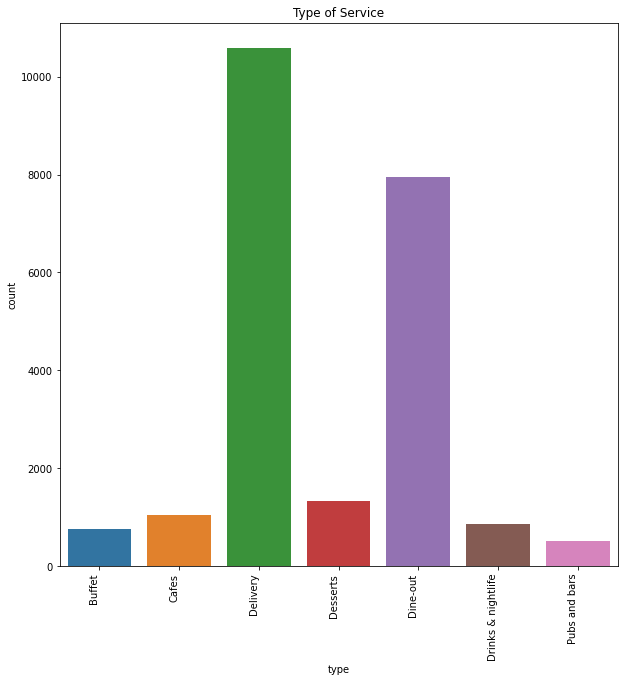

In [ ]:
sns.countplot(X['type'])
sns.countplot(X['type']).set_xticklabels(sns.countplot(X['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of Service')

Text(0.5, 1.0, 'Top 10 restuarants in Bangalore')

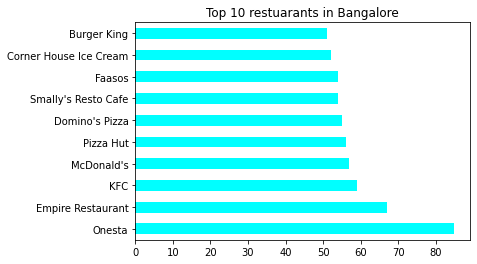

In [ ]:
temp = X.name.value_counts()
temp = temp.head(10).plot(kind = 'barh',color='cyan')
temp.set_title('Top 10 restuarants in Bangalore')

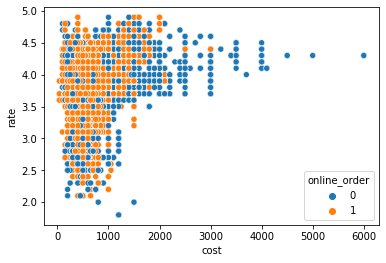

In [ ]:
sns.scatterplot(data = X ,x='cost', y='rate',hue='online_order',
    sizes=(20, 200), legend="full")

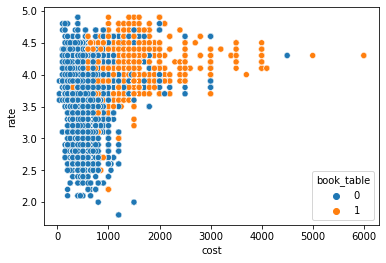

In [ ]:
sns.scatterplot(data = X ,x='cost', y='rate',hue='book_table',
    sizes=(20, 200), legend="full")

Text(0.5, 1.0, 'Cost of Restuarant')

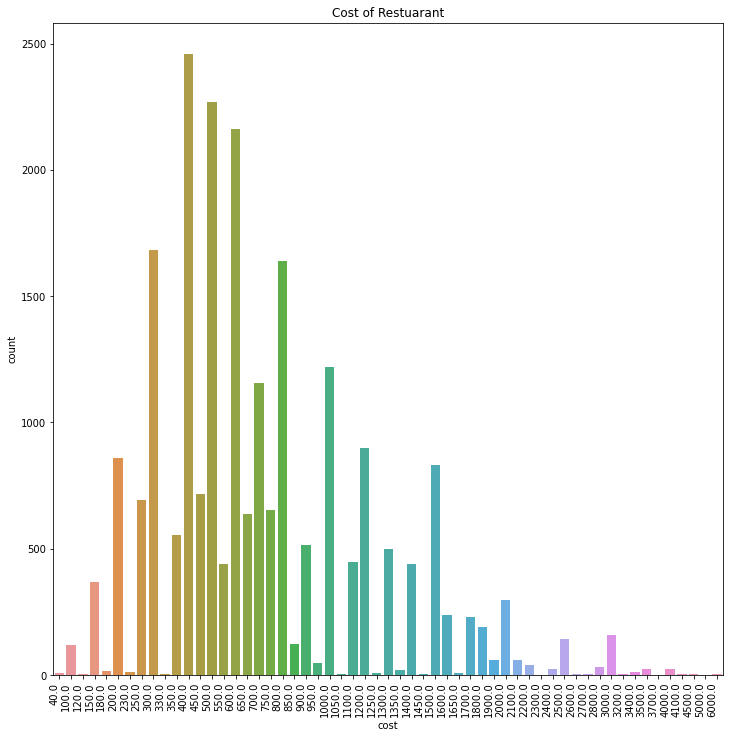

In [ ]:
sns.countplot(X['cost'])
sns.countplot(X['cost']).set_xticklabels(sns.countplot(X['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Cost of Restuarant')

In [ ]:
X = X.drop(['url','address','phone','location','city','menu_item'],axis=1)

# Key Findings

In [ ]:
X.groupby('online_order').mean()

,book_table,rate,votes,cost
online_order,,,,
0,0.357979,3.930227,744.678767,994.039117
1,0.222434,3.893680,547.026017,655.017488


In [ ]:
X.groupby('book_table').mean()

,online_order,rate,votes,cost
book_table,,,,
0,0.745193,3.813349,387.606057,566.271097
1,0.600066,4.160636,1216.599735,1283.587154


In [ ]:
# for column in X.columns[~X.columns.isin(['rate', 'cost', 'votes'])]:
#     print(pd.factorize(X[column])[0])
#     print('===============')

In [ ]:
def Encode(X):
    for column in X.columns[~X.columns.isin(['rate', 'cost', 'votes'])]:
        X[column] = pd.factorize(X[column])[0]
    return X

enc = Encode(X.copy())
enc

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,type
0,0,0,0,4.1,775,0,0,0,800.0,0,0
1,1,0,1,4.1,787,0,1,1,800.0,1,0
2,2,0,1,3.8,918,1,2,2,800.0,2,0
3,3,1,1,3.7,88,2,3,3,300.0,3,0
4,4,1,1,3.8,166,0,4,4,600.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
23041,1484,0,0,3.8,128,33,1780,852,1200.0,2445,6
23042,1310,1,1,3.9,77,58,55,161,2000.0,2180,6
23043,1312,1,1,2.8,161,15,1555,774,1200.0,2182,6
23044,840,1,1,2.5,81,15,5144,501,800.0,13897,6


# Standardizing the data

In [ ]:
scaler = StandardScaler()

In [ ]:
x_fit=scaler.fit_transform(enc)

In [ ]:
enc=pd.DataFrame(x_fit,columns=enc.columns)
enc.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,type
0,-1.498317,-0.643526,-1.677776,0.458813,0.152229,-0.624891,-1.519327,-1.068466,0.087628,-1.473825,-2.240464
1,-1.497063,-0.643526,0.596027,0.458813,0.162968,-0.624891,-1.518592,-1.066135,0.087628,-1.473584,-2.240464
2,-1.495809,-0.643526,0.596027,-0.244825,0.280211,-0.545131,-1.517857,-1.063804,0.087628,-1.473342,-2.240464
3,-1.494555,1.553940,0.596027,-0.479371,-0.462623,-0.465371,-1.517122,-1.061473,-0.871095,-1.473101,-2.240464
4,-1.493301,1.553940,0.596027,-0.244825,-0.392815,-0.624891,-1.516387,-1.059142,-0.295861,-1.472859,-2.240464


In [ ]:
enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23046 entries, 0 to 23045
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23046 non-null  float64
 1   online_order  23046 non-null  float64
 2   book_table    23046 non-null  float64
 3   rate          23046 non-null  float64
 4   votes         23046 non-null  float64
 5   rest_type     23046 non-null  float64
 6   dish_liked    23046 non-null  float64
 7   cuisines      23046 non-null  float64
 8   cost          23046 non-null  float64
 9   reviews_list  23046 non-null  float64
 10  type          23046 non-null  float64
dtypes: float64(11)
memory usage: 1.9 MB


# Correlation between different variables

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'cost', 'reviews_list', 'type'],
      dtype='object')

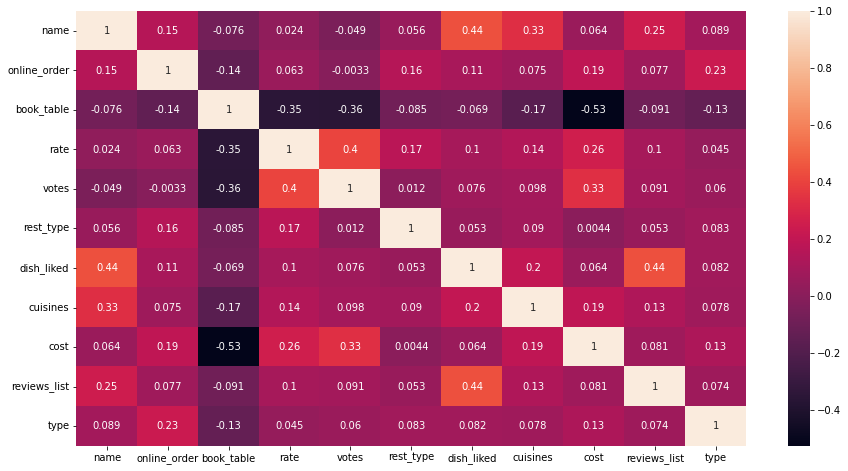

In [ ]:
corr = enc.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
enc.columns

# Splitting the dataset


In [ ]:
x = enc.iloc[:, [1,2,4,5,6,7,8,9,10]]
y = X.rate
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
x_train.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,reviews_list,type
19046,-0.643526,0.596027,-0.314951,3.044072,0.463452,0.754406,-0.775223,1.331909,-0.662874
4057,-0.643526,0.596027,2.543617,-0.624891,0.079096,-1.056811,-0.295861,-0.744696,-0.662874
139,-0.643526,0.596027,-0.252303,-0.624891,-1.426728,-1.012521,0.183500,-1.442449,-0.662874
16780,-0.643526,0.596027,-0.221873,-0.465371,-0.700640,-1.056811,-0.775223,0.279608,-0.662874
9593,-0.643526,-1.677776,0.216667,0.571510,-1.167306,-0.380810,0.662862,-0.059494,1.703511


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

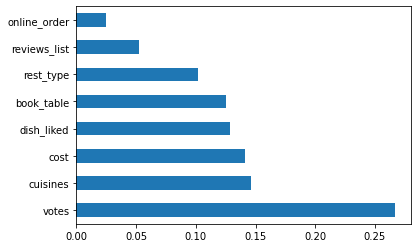

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# Linear Regressor

**Linear Regression** is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(x_train,y_train)
IPython.display.clear_output()
LR_predict = reg.predict(x_test)
mean_squared_error(y_test, LR_predict)

0.13614191565519995

In [ ]:
reg.score(x_test, y_test)

0.2381021002722188

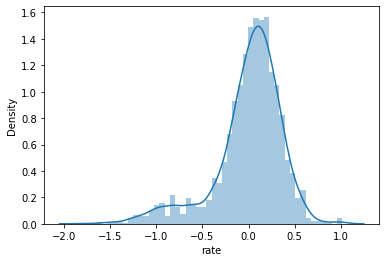

In [ ]:
sns.distplot(y_test-LR_predict)

Apply KMeans for preprocessing

In [ ]:
pipeline_reg = Pipeline([
("kmeans", KMeans(n_clusters=50)),
("reg", LinearRegression()),
])

pipeline_reg.fit(x_train, y_train)
IPython.display.clear_output()

In [ ]:
pipeline_reg.score(x_test, y_test)

0.2808331161620693

In [ ]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline_reg, param_grid, cv=3, verbose=2)
grid_clf.fit(x_train, y_train)
IPython.display.clear_output()

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 99}

In [ ]:
grid_clf.score(x_test, y_test)

0.2936868283658659

In [ ]:
grid_clf_predict = grid_clf.predict(x_test)
mean_squared_error(y_test, grid_clf_predict)

0.12620959878367913

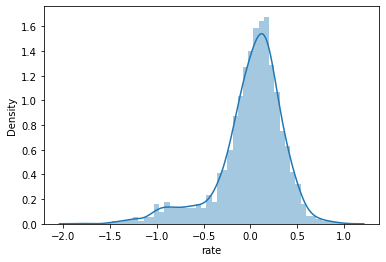

In [ ]:
sns.distplot(y_test-grid_clf_predict)

# SVR

###### Support Vector Machine
In machine learning, Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. In Support Vector Regression, the straight line that is required to fit the data is referred to as **hyperplane**.


The objective of a support vector machine algorithm is to find a hyperplane in an n-dimensional space that distinctly classifies the data points. The data points on either side of the hyperplane that are closest to the hyperplane are called **Support Vectors**. These influence the position and orientation of the hyperplane and thus help build the SVM.

So what exactly is Support Vector Machine (SVM)? We’ll start by understanding SVM in simple terms. Let’s say we have a plot of two label classes as shown in the figure below:

Can you decide what the separating line will be? You might have come up with this:

The line fairly separates the classes. This is what SVM essentially does – **simple class separation**. Now, what is the data was like this:

Here, we don’t have a simple line separating these two classes. So we’ll extend our dimension and introduce a new dimension along the z-axis. We can now separate these two classes:

When we transform this line back to the original plane, it maps to the circular boundary as I’ve shown here:

This is exactly what SVM does! It tries to find a line/hyperplane (in multidimensional space) that separates these two classes. Then it classifies the new point depending on whether it lies on the positive or negative side of the hyperplane depending on the classes to predict.

###### Support Vector Regression
SVR is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value. The threshold value is the distance between the hyperplane and boundary line. The fit time complexity of SVR is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.

For large datasets, **Linear SVR** or **SGD Regressor** is used. Linear SVR provides a faster implementation than SVR but only considers the linear kernel. The model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

###### Hyperparameters in SVR

Now that we have an intuition of what a support vector machine is, we will take look into the various hyperparameters that are used in Support Vector Regression. Some of the key parameters used are as mentioned below:

1. **Kernel**:
A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost. Usually, the computational cost will increase if the dimension of the data increases. This increase in dimension is required when we are unable to find a separating hyperplane in a given dimension and are required to move in a higher dimension:

The most widely used kernels include **Linear, Non-Linear, Polynomial, Radial Basis Function (RBF) and Sigmoid**. By default, RBF is used as the **kernel**. Each of these kernels are used depending on the dataset.

2. **Hyperplane**: 
This is basically a separating line between two data classes in SVM. But in Support Vector Regression, this is the line that will be used to predict the continuous output
3. **Decision Boundary**: 
A decision boundary can be thought of as a demarcation line (for simplification) on one side of which lie positive examples and on the other side lie the negative examples. On this very line, the examples may be classified as either positive or negative. This same concept of SVM will be applied in Support Vector Regression as well

Advantages of Support Vector Regression
* Although Support Vector Regression is used rarely it carries certain advantages that are as mentioned below:
* It is robust to outliers.
* Decision model can be easily updated.
* It has excellent generalization capability, with high prediction accuracy.
* Its implementation is easy.

Disadvantages of Support Vector Regression
* Some of the drawbacks faced by Support Vector Machines while handling regression problems are as mentioned below:
* They are not suitable for large datasets.
* In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
* The Decision model does not perform very well when the data set has more noise i.e. target classes are overlapping..

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x_train, y_train)
IPython.display.clear_output()
svr_predict = reg.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, svr_predict)

0.13614191565519995

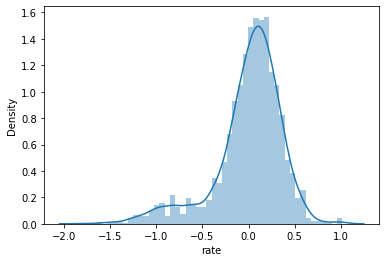

In [ ]:
sns.distplot(y_test-svr_predict)

# K-nearest neighbors


1. Intro
* Out of all the machine learning algorithms I have come across, KNN algorithm has easily been the simplest to pick up. Despite its simplicity, it has proven to be incredibly effective at certain tasks (as you will see in this article).

* And even better? It can be used for both classification and regression problems! KNN algorithm is by far more popularly used for classification problems, however. I have seldom seen KNN being implemented on any regression task. My aim here is to illustrate and emphasize how KNN can be equally effective when the target variable is continuous in nature.

2. How does the KNN algorithm work?
As we saw above, KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. From our example, we know that ID11 has height and age similar to ID1 and ID5, so the weight would also approximately be the same.

Below is a stepwise explanation of the algorithm:
1. First, the distance between the new point and each training point is calculated.
![image.png](attachment:image.png)

2. The closest k data points are selected (based on the distance). In this example, points 1, 5, 6 will be selected if the value of k is 3. We will further explore the method to select the right value of k later in this article.
![image-2.png](attachment:image-2.png)

3. Methods of the calculating distance between points.
The first step is to calculate the distance between the new point and each training point. There are various methods for calculating this distance, of which the most commonly known methods are – Euclidian, Manhattan (for continuous) and Hamming distance (for categorical).

1. **Euclidean Distance**: Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).
2. **Manhattan Distance**: This is the distance between real vectors using the sum of their absolute difference.
![image-3.png](attachment:image-3.png)
3. **Hamming Distance**: It is used for categorical variables. If the value (x) and the value (y) are the same, the distance D will be equal to 0 . Otherwise D=1.
![image-4.png](attachment:image-4.png)

Advantages:

* The computational complexity of the training process is zero.
* Predicting the outcome of new data is simple.
* No need to make any assumptions about the distribution of classes

Disadvantages:

* KNN is very sensitive to noise when K is small.
* As mentioned, KNN is an algorithm where all calculations are in the testing stage. In which, calculating the distance to each data point in the training set will take a lot of time, especially with databases with large dimensions and many data points. With larger K, the complexity will also increase. In addition, storing all data in memory also affects the performance of KNN.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
Neigh = KNeighborsRegressor(n_neighbors=5)
Neigh.fit(x_train,y_train)
IPython.display.clear_output()
y_predict = Neigh.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

0.10290655097613884

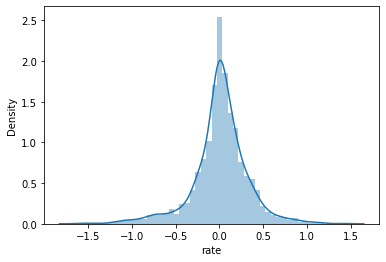

In [ ]:
sns.distplot(y_test-y_predict)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(20)}

Neigh = KNeighborsRegressor()

model = GridSearchCV(Neigh, params, cv=5)
model.fit(x_train, y_train)
IPython.display.clear_output()
model.best_params_

{'n_neighbors': 3}

In [ ]:
Neigh = KNeighborsRegressor(n_neighbors=3)
Neigh.fit(x_train,y_train)
IPython.display.clear_output()
Neigh_predict = Neigh.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Neigh_predict)

0.09775560375994216

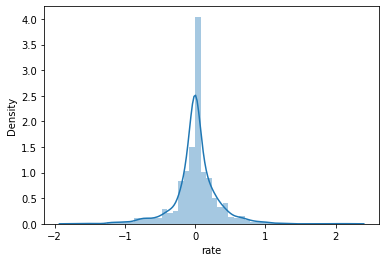

In [ ]:
sns.distplot(y_test-Neigh_predict)

# Bagging regression

###### What is Bagging (Bootstrap Aggregation)?
Ensemble machine learning can be mainly categorized into bagging and boosting. The bagging technique is useful for both regression and statistical classification. Bagging is used with decision trees, where it significantly raises the stability of models in improving accuracy and reducing variance, which eliminates the challenge of overfitting.

![image.png](attachment:image.png)
Bagging (Bootstrap Aggregation) Flow. [Source](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789136609/5/ch05lvl1sec29/bootstrap-aggregation)

Bagging in ensemble machine learning takes several weak models, aggregating the predictions to select the best prediction. The weak models specialize in distinct sections of the feature space, which enables bagging leverage predictions to come from every model to reach the utmost purpose.

###### What is Bootstrapping?
Bagging is composed of two parts: aggregation and bootstrapping. Bootstrapping is a sampling method, where a sample is chosen out of a set, using the replacement method. The learning algorithm is then run on the samples selected.

The bootstrapping technique uses sampling with replacements to make the selection procedure completely random. When a sample is selected without replacement, the subsequent selections of variables are always dependent on the previous selections, making the criteria non-random.

###### What is Aggregation?

Model predictions undergo aggregation to combine them for the final prediction to consider all the possible outcomes. The aggregation can be done based on the total number of outcomes or the probability of predictions derived from the bootstrapping of every model in the procedure.

###### Advantages and Disadvantages of Bagging 
Random forest is one of the most popular bagging algorithms. Bagging offers the advantage of allowing many weak learners to combine efforts to outdo a single strong learner. It also helps in the reduction of variance, hence eliminating the overfitting of models in the procedure.

One disadvantage of bagging is that it introduces a loss of interpretability of a model. The resultant model can experience lots of bias when the proper procedure is ignored. Despite bagging being highly accurate, it can be computationally expensive, which may discourage its use in certain instances.

###### Bagging vs. Boosting
The best technique to use between bagging and boosting depends on the data available, simulation, and any existing circumstances at the time. An estimate’s variance is significantly reduced by bagging and boosting techniques during the combination procedure, thereby increasing the accuracy. Therefore, the results obtained demonstrate higher stability than the individual results.

When an event presents the challenge of low performance, the bagging technique will not result in a better bias. However, the boosting technique generates a unified model with lower errors since it concentrates on optimizing the advantages and reducing shortcomings in a single model.

When the challenge in a single model is overfitting, the bagging method performs better than the boosting technique. Boosting faces the challenge of handling over-fitting since it comes with over-fitting in itself.

In [ ]:
# from sklearn.ensemble import BaggingRegressor
# BagReg = BaggingRegressor(base_estimator=RForest, n_estimators=500, random_state=0)
# BagReg.fit(x_train, y_train)
# y_predict = BagReg.predict(x_test)
# from sklearn.metrics import r2_score
# r2_score(y_test,y_predict)

In [ ]:
# sns.distplot(y_test-y_predict)

# Decision Tree Regressor


[Decision tree](https://www.saedsayad.com/decision_tree_reg.htm) builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with **decision nodes** and **leaf nodes**. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called **root node**. Decision trees can handle both categorical and numerical data. 

###### Decision Tree Algorithm
The core algorithm for building decision trees called **ID3** by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. The ID3 algorithm can be used to construct a decision tree for regression by replacing Information Gain with Standard Deviation Reduction.

***Standard Deviation***

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). We use standard deviation to calculate the homogeneity of a numerical sample. If the numerical sample is completely homogeneous its standard deviation is zero.

***Standard Deviation Reduction***

The standard deviation reduction is based on the decrease in standard deviation after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest standard deviation reduction (i.e., the most homogeneous branches).

**Advantages**:
* The model generates rules that are easy to understand for the reader, creating a set of rules with each leaf branch being a rule of the tree.
* Input data can be missing data, no need to normalize or create dummy variables.
* Can work with both numeric and categorical data.
* The model can be validated using statistical tests.
* Likely to work with big data.

**Disadvantages**:
* The decision tree model is highly dependent on your data. Even with a small change in the data set, the decision tree model structure can change completely.
* Decision trees often have overfitting problems

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
IPython.display.clear_output()
Dtree_predict = DTree.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Dtree_predict)

0.02887861742563981

In [ ]:
DTree.score(x_test, y_test)

[Text(0.5653837273101818, 0.984375, 'X[2] <= -0.145\nsquared_error = 0.182\nsamples = 20741\nvalue = 3.904'),
 Text(0.22887673713269632, 0.953125, 'X[1] <= -0.541\nsquared_error = 0.18\nsamples = 14065\nvalue = 3.779'),
 Text(0.04067155509788538, 0.921875, 'X[2] <= -0.459\nsquared_error = 0.101\nsamples = 1942\nvalue = 4.013'),
 Text(0.005248729731749234, 0.890625, 'X[4] <= -1.487\nsquared_error = 0.119\nsamples = 241\nvalue = 3.754'),
 Text(0.0034484046925203618, 0.859375, 'X[3] <= 1.768\nsquared_error = 0.152\nsamples = 18\nvalue = 3.172'),
 Text(0.003209295374729134, 0.828125, 'X[4] <= -1.496\nsquared_error = 0.071\nsamples = 14\nvalue = 3.007'),
 Text(0.0029701860569379063, 0.796875, 'squared_error = 0.0\nsamples = 4\nvalue = 2.6'),
 Text(0.0034484046925203618, 0.796875, 'X[2] <= -0.488\nsquared_error = 0.006\nsamples = 10\nvalue = 3.17'),
 Text(0.003209295374729134, 0.765625, 'squared_error = 0.0\nsamples = 5\nvalue = 3.1'),
 Text(0.0036875140103115895, 0.765625, 'squared_error = 

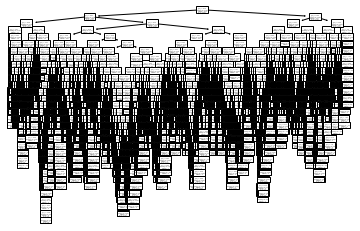

In [ ]:
from sklearn import tree
tree.plot_tree(DTree)

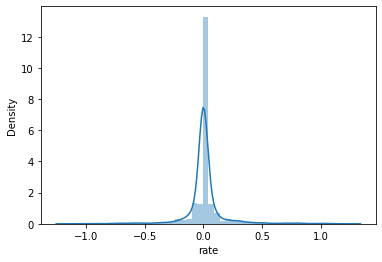

In [ ]:
sns.distplot(y_test-Dtree_predict)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor

pipeline_DTree = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("DTree", DecisionTreeRegressor()),
])
pipeline_DTree.fit(x_train, y_train)
IPython.display.clear_output()

In [ ]:
pipeline_DTree.score(x_test, y_test)

0.3188627422949962

In [ ]:
from sklearn.model_selection import GridSearchCV

#params = {'n_clusters': np.arange(2, 100), 'max_depth': np.arange(2, 100)}
param_grid = dict(kmeans__n_clusters=range(2, 100), DTree__max_depth=np.arange(100))

model = GridSearchCV(pipeline_DTree, param_grid, cv=2,
                     return_train_score=True)
model.fit(x_train, y_train)
IPython.display.clear_output()

In [ ]:
model.best_params_

In [ ]:
model.score(x_test, y_test)

In [ ]:
# cvres = model.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [ ]:
DTree = DecisionTreeRegressor(max_depth=91)
DTree.fit(x_train,y_train)
IPython.display.clear_output()
Dtree_predict = DTree.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Dtree_predict)

In [ ]:
sns.distplot(y_test-Dtree_predict)

# Random Forest Regressor


In [random forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size `max_features`. (See the [parameter tuning guidelines](https://scikit-learn.org/stable/modules/ensemble.html#parameters) for more details).

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

In contrast to the original publication [B2001](https://scikit-learn.org/stable/modules/ensemble.html#b2001), the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500, random_state=430, min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
IPython.display.clear_output()
RForest_predict = RForest.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, RForest_predict)

0.0236052165781118

The main parameters to adjust when using these methods is n_estimators and max_features. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. Empirical good default values are `max_features=None` (always considering all features instead of a random subset) for regression problems, and `max_features="sqrt"` (using a random subset of size `sqrt(n_features)`) for classification tasks (where `n_features` is the number of features in the data). Good results are often achieved when setting max_depth=None in combination with `min_samples_split=2` (i.e., when fully developing the trees). Bear in mind though that these values are usually not optimal, and might result in models that consume a lot of RAM. The best parameter values should always be cross-validated. In addition, note that in random forests, bootstrap samples are used by default (`bootstrap=True`) while the default strategy for extra-trees is to use the whole dataset (`bootstrap=False`). When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. This can be enabled by setting `oob_score=True`.

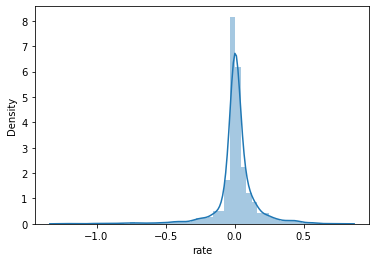

In [ ]:
sns.distplot(y_test-RForest_predict)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = [
    {'n_estimators': [50, 100, 500], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [50, 100, 500], 'max_features': [2, 4, 6]},
]

RForest = RandomForestRegressor()

grid_search = GridSearchCV(RForest, params, 
                     scoring='neg_mean_squared_error', cv=5,
                     return_train_score=True)
grid_search.fit(x_train, y_train)
IPython.display.clear_output()
grid_search.best_params_ 

{'bootstrap': False, 'max_features': 6, 'n_estimators': 500}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=500)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.18057573922818038 {'max_features': 2, 'n_estimators': 50}
0.1777297093598173 {'max_features': 2, 'n_estimators': 100}
0.17669748018482215 {'max_features': 2, 'n_estimators': 500}
0.15437863805612403 {'max_features': 4, 'n_estimators': 50}
0.15360859055700732 {'max_features': 4, 'n_estimators': 100}
0.15171732033510077 {'max_features': 4, 'n_estimators': 500}
0.15045816622408895 {'max_features': 6, 'n_estimators': 50}
0.14847551562890626 {'max_features': 6, 'n_estimators': 100}
0.1477290645342522 {'max_features': 6, 'n_estimators': 500}
0.15433983925954187 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
0.15197982157470738 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
0.15169677814201296 {'bootstrap': False, 'max_features': 2, 'n_estimators': 500}
0.12986896681120144 {'bootstrap': False, 'max_features': 4, 'n_estimators': 50}
0.12872868923114597 {'bootstrap': False, 'max_features': 4, 'n_estimators': 100}
0.12781414182003456 {'bootstrap': False, 'max_feature

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor(bootstrap=True, n_estimators=500, random_state=6, )
RForest.fit(x_train,y_train)
IPython.display.clear_output()
RForest_predict = RForest.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, RForest_predict)

0.014799472694946815

In [ ]:
# from sklearn.tree import plot_tree
# fig = plt.figure(figsize=(15, 10))
# plot_tree(RForest.estimators_[0], 
#           feature_names=X.columns,
#           class_names=y,
#           filled=True, impurity=True, 
#           rounded=True)

**Hint**: Khi bạn không biết siêu tham số phải có giá trị nào, một cách tiếp cận đơn giản là thử các lũy thừa liên tiếp của 10 (hoặc một số nhỏ hơn nếu bạn muốn tìm kiếm chi tiết hơn.

# Voting Regressor

Suppose you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, an SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier, and perhaps a few more

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.

Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the best classifier in the ensemble. In fact, even if each classifier is a weak learner (meaning it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.

In [ ]:
from sklearn.ensemble import VotingRegressor
Voting = VotingRegressor(estimators=[('DTree', DTree), ('RForest', RForest)])
Voting.fit(x_train, y_train)
IPython.display.clear_output()
Voting_predict = Voting.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Voting_predict)

0.018403015519450637

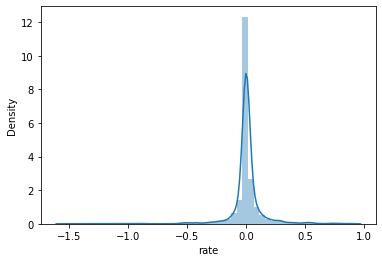

In [ ]:
sns.distplot(y_test-Voting_predict)

In [ ]:
# plt.figure()
# plt.plot(GBReg_predict, "gd", label="GradientBoostingRegressor")
# plt.plot(RForest_predict, "b^", label="RandomForestRegressor")
# plt.plot(LR_predict, "ys", label="LinearRegression")
# plt.plot(Voting_predict, "r*", label="VotingRegressor")

# plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
# plt.ylabel("predicted")
# plt.xlabel("training samples")
# plt.legend(loc="best")
# plt.title("Regressor predictions and their average")

# plt.show()